The following code is from: https://www.datacamp.com/tutorial/random-forests-classifier-python

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.tree import export_graphviz
from IPython.display import Image
import create_dataset as cd
import feature_engineering as fe
import os 
from prep import * 

In [2]:
model_data = pd.read_csv("datasets/processed_data.csv")
model_data = model_data.drop(columns = ['datetime'])
model_data = aggregate_rf(model_data)


In [3]:


x = model_data.drop('fall_top', axis=1)
y = model_data['fall_top']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

mod = RandomForestClassifier(random_state= 42)
mod.fit(X_train, Y_train)

Y_pred = mod.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred, zero_division=0)
recall = recall_score(Y_test, Y_pred, zero_division=0)
f1 = f1_score(Y_test, Y_pred, zero_division=0)

print("accuracy:", accuracy, " precision:", precision, "precision:", recall, "f1:", f1)


accuracy: 0.7894736842105263  precision: 0.0 precision: 0.0 f1: 0.0


In [4]:
param_dist = {'n_estimators': randint(50,1500),
            'max_depth': randint(1,20)}
    
mod = RandomForestClassifier(random_state= 42)

rand_search = RandomizedSearchCV(mod, param_distributions = param_dist, n_iter=5, cv=3)

rand_search.fit(X_train, Y_train)

best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 15, 'n_estimators': 542}


accuracy: 0.7894736842105263  precision: 0.0 precision: 0.0 f1: 0.0


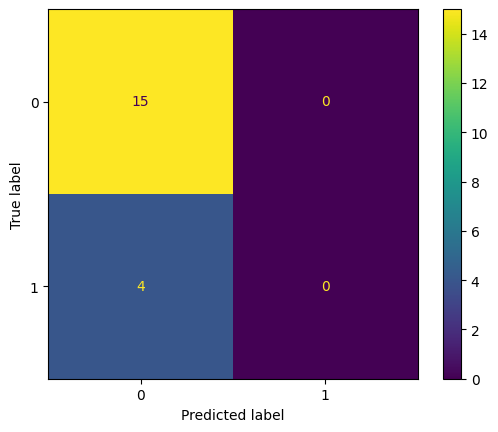

In [5]:
Y_pred_best = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(Y_test, Y_pred_best)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()


accuracy = accuracy_score(Y_test, Y_pred_best)
precision = precision_score(Y_test, Y_pred_best, zero_division=0)
recall = recall_score(Y_test, Y_pred_best, zero_division=0)
f1 = f1_score(Y_test, Y_pred_best, zero_division=0)

print("accuracy:", accuracy, " precision:", precision, "precision:", recall, "f1:", f1)